# Import Library

In [53]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [54]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [55]:
df = pd.read_csv('drive/MyDrive/dataset_buys_comp.csv', encoding='latin-1')
df.head()

,Age,Income,Student,Credit_Rating,Buys_Computer
0,Tua,Tinggi,Ya,Buruk,0
1,Paruh Baya,Tinggi,Ya,Baik,1
2,Paruh Baya,Rendah,Tidak,Buruk,1
3,Tua,Rendah,Tidak,Baik,1
4,Tua,Rendah,Ya,Baik,1


In [56]:
df.count()

,0
Age,1000
Income,1000
Student,1000
Credit_Rating,1000
Buys_Computer,1000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            1000 non-null   object
 1   Income         1000 non-null   object
 2   Student        1000 non-null   object
 3   Credit_Rating  1000 non-null   object
 4   Buys_Computer  1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [58]:
df.value_counts()

Age         Income  Student  Credit_Rating  Buys_Computer
Paruh Baya  Rendah  Ya       Buruk          1                43
            Sedang  Tidak    Buruk          1                38
                    Ya       Buruk          1                36
Muda        Tinggi  Ya       Baik           1                35
Paruh Baya  Tinggi  Tidak    Baik           1                32
Muda        Tinggi  Ya       Buruk          1                32
            Rendah  Ya       Baik           1                31
Paruh Baya  Rendah  Tidak    Buruk          1                31
Muda        Sedang  Ya       Baik           1                30
Tua         Tinggi  Ya       Buruk          0                30
Paruh Baya  Tinggi  Tidak    Buruk          0                28
Tua         Tinggi  Tidak    Buruk          0                28
Muda        Rendah  Ya       Buruk          1                26
            Tinggi  Tidak    Buruk          0                26
Paruh Baya  Sedang  Tidak    Baik           1                25
            Rendah  Tidak    Baik           1                24
Muda        Sedang  Ya       Buruk          1                24
Paruh Baya  Tinggi  Ya       Buruk          0                24
Tua         Tinggi  Tidak    Baik           1                22
Paruh Baya  Tinggi  Ya       Baik           1                22
            Rendah  Ya       Baik           1                22
            Sedang  Ya       Baik           1                21
Muda        Rendah  Tidak    Buruk          1                21
Tua         Rendah  Ya       Buruk          0                20
            Tinggi  Ya       Baik           0                19
            Rendah  Ya       Buruk          1                17
Muda        Sedang  Tidak    Baik           1                16
Tua         Rendah  Tidak    Baik           0                15
            Sedang  Ya       Baik           0                14
            Tinggi  Tidak    Baik           0                14
Muda        Tinggi  Tidak    Baik           0                14
Tua         Rendah  Tidak    Buruk          0                13
            Sedang  Ya       Buruk          0                13
Muda        Tinggi  Tidak    Baik           1                13
Tua         Sedang  Tidak    Buruk          0                13
                                            1                13
                             Baik           1                12
                    Ya       Baik           1                12
            Rendah  Tidak    Buruk          1                12
            Sedang  Tidak    Baik           0                12
Muda        Rendah  Tidak    Baik           0                12
            Sedang  Tidak    Buruk          1                11
                             Baik           0                11
Tua         Sedang  Ya       Buruk          1                11
            Rendah  Ya       Baik           1                11
Muda        Sedang  Tidak    Buruk          0                11
Tua         Rendah  Tidak    Baik           1                10
                    Ya       Baik           0                 9
Muda        Rendah  Tidak    Baik           1                 8
Tua         Tinggi  Ya       Baik           1                 8
Muda        Rendah  Tidak    Buruk          0                 5
Name: count, dtype: int64

# Preprocessing

In [59]:
le = LabelEncoder()
for col in ['Age', 'Income', 'Student', 'Credit_Rating']:
    df[col] = le.fit_transform(df[col])

In [60]:
df.head()

,Age,Income,Student,Credit_Rating,Buys_Computer
0,2,2,1,1,0
1,1,2,1,0,1
2,1,0,0,1,1
3,2,0,0,0,1
4,2,0,1,0,1


# Split Dataset

In [61]:
X = df.drop('Buys_Computer', axis=1)
y = df['Buys_Computer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modeling dengan Naive Bayes

In [62]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [63]:
y_pred = model.predict(X_test)

# Evaluasi

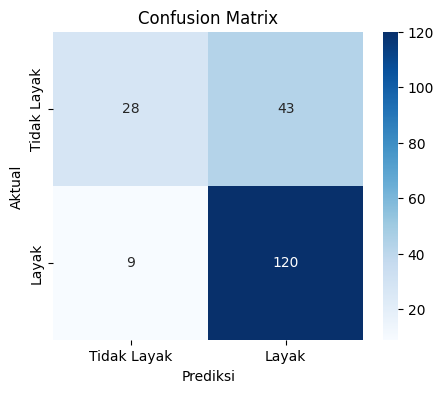

In [64]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Layak', 'Layak'], yticklabels=['Tidak Layak', 'Layak'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [65]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Tidak Layak', 'Layak']))

print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

 Tidak Layak       0.76      0.39      0.52        71
       Layak       0.74      0.93      0.82       129

    accuracy                           0.74       200
   macro avg       0.75      0.66      0.67       200
weighted avg       0.74      0.74      0.71       200

Accuracy: 0.74
